<img src="https://user-images.strikinglycdn.com/res/hrscywv4p/image/upload/c_limit,fl_lossy,h_300,w_300,f_auto,q_auto/1266110/Logo_wzxi0f.png" style="float: left; margin: 20px; height: 55px">

***The greatest glory in living lies not in never falling, but in rising every time we fall - Nelson Mandela***

# 1. Categorical & Dummy Variables

***LEARNING OBJECTIVES***
*After this lesson, you will be able to:*
- Be able to use `get_dummies` and other ways of converting categorical data to numerical data
- How to create indicator variable (0 or 1) columns from categorical data

## Introduction

Regression analysis is used with numerical variables. Results only have a valid
interpretation if it makes sense to assume that having a value of 2 on some variable
is does indeed mean having twice as much of something as a 1, and having a 50 means
50 times as much as 1. But, some times you need to work with categorical variables
in which the different values have no real numerical relationship with each other.
The solution is, to use categorical and dummy variables

A categorical variable is an independent or predictor variable that contains
values indicating membership in one of several possible categories. E.g.,
gender (male or female), marital status (married, single, divorced,
widowed). The categories are often assigned numerical values used as
labels, e.g., 0 = male; 1 = female.

A dummy variable is created by recoding categorial variables that have more than
two categories into a series of binary variables.

Here is more information on different [types of variables](http://www.indiana.edu/~educy520/sec5982/week_2/variable_types.pdf).

## Categorical Variables

Why exactly would you want to use categorical variables?
The categorical data type is useful in the following cases:

- A string variable consisting of only a few different values. Converting such a
    string variable to a categorical variable will save some memory, see  
    [here](https://pandas-docs.github.io/pandas-docs-travis/categorical.html#categorical-memory).
- The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a 
    categorical and specifying an order on the categories, sorting and min/max will
    use the logical order instead of the lexical order, see
    [here](https://pandas-docs.github.io/pandas-docs-travis/categorical.html#categorical-sort)
- As a signal to other python libraries that this column should be treated as a
    categorical variable (e.g. to use suitable statistical methods or plot types).

Let's use pandas to create a few Categorical Series. One way is by specifying
`dtype="category"` when constructing a Series:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
s = pd.Series(["a","b","c","a"], dtype="category")
s

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

Another way is to convert an existing Series or column to a category dtype:

In [ ]:
df = pd.DataFrame({"A":["a","b","c","a"]})
df["B"] = df["A"].astype('category')
df

,A,B
0,a,a
1,b,b
2,c,c
3,a,a


In [ ]:
df.dtypes

A      object
B    category
dtype: object

Analogously, all columns in an existing DataFrame can be batch converted using `DataFrame.astype()`

In [ ]:
df_cat = df.astype('category')
df_cat.dtypes

A    category
B    category
dtype: object

You can also pass a `pandas.Categorical` object to a Series or assign it to a DataFrame.

In [ ]:
raw_cat = pd.Categorical(["a","b","c","a"], categories=["b","c","d"],
                          ordered=False)

In [ ]:
s = pd.Series(raw_cat)
s

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): [b, c, d]

Another way to create categorical columns is by using special functions, such as `cut()`, which groups data into discrete bins.

In [ ]:
df = pd.DataFrame({'value': np.random.randint(0, 100, 20)})
df

,value
0,90
1,26
2,8
3,50
4,61
5,31
6,97
7,69
8,87
9,80


In [ ]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 100, 10)]
labels

['0 - 9',
 '10 - 19',
 '20 - 29',
 '30 - 39',
 '40 - 49',
 '50 - 59',
 '60 - 69',
 '70 - 79',
 '80 - 89',
 '90 - 99']

In [ ]:
df['group'] = pd.cut(df.value, range(0, 105, 10), right=False, labels=labels)
df.head(10)

,value,group
0,9,0 - 9
1,71,70 - 79
2,4,0 - 9
3,67,60 - 69
4,46,40 - 49
5,53,50 - 59
6,43,40 - 49
7,29,20 - 29
8,20,20 - 29
9,55,50 - 59


In the examples above where we passed `dtype='category'`, we used the default behavior:

Categories are inferred from the data.
Categories are unordered.
To control those behaviors, instead of passing 'category', use an instance of `CategoricalDtype`.

In [ ]:
from pandas.api.types import CategoricalDtype

In [ ]:
s = pd.Series(["a", "b", "c", "a"])
s

0    a
1    b
2    c
3    a
dtype: object

In [ ]:
cat_type = CategoricalDtype(categories=["b", "c", "d"], ordered=True)

In [ ]:
s_cat = s.astype(cat_type)
s_cat

0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (3, object): [b < c < d]

Similarly, a `CategoricalDtype` can be used with a DataFrame to ensure that categories are consistent among all columns.

In [ ]:
df = pd.DataFrame({'A': list('khbbfcgbcaj'), 'B': list('kjihgfedcba')})
df

,A,B
0,k,k
1,h,j
2,b,i
3,b,h
4,f,g
5,c,f
6,g,e
7,b,d
8,c,c
9,a,b


In [ ]:
cat_type = CategoricalDtype(categories=list('abcdefghijk'), ordered=True)

In [ ]:
df_cat = df.astype(cat_type)
df_cat.dtypes

A    category
B    category
dtype: object

In [ ]:
df_cat['A']

0     k
1     h
2     b
3     b
4     f
5     c
6     g
7     b
8     c
9     a
10    j
Name: A, dtype: category
Categories (11, object): [a < b < c < d ... h < i < j < k]

In [ ]:
df_cat['B']

0     k
1     j
2     i
3     h
4     g
5     f
6     e
7     d
8     c
9     b
10    a
Name: B, dtype: category
Categories (11, object): [a < b < c < d ... h < i < j < k]

In [ ]:
df_cat_c= df_cat[df_cat > 'c']
df_cat_c

,A,B
0,k,k
1,h,j
2,NaN,i
3,NaN,h
4,f,g
5,NaN,f
6,g,e
7,NaN,d
8,NaN,NaN
9,NaN,NaN


If you already have `codes` and `categories`, you can use the `from_codes()` constructor to save the factorize step during normal constructor mode:

In [ ]:
splitter = np.random.choice([0, 1], 5, p=[0.5, 0.5])
splitter

array([0, 1, 0, 0, 0])

In [ ]:
s = pd.Series(pd.Categorical.from_codes(splitter, categories=["train", "test"]))
s

0    train
1     test
2    train
3    train
4    train
dtype: category
Categories (2, object): [train, test]

**Check:** Why would you use a categorical variable?
[categorical variable](https://pandas-docs.github.io/pandas-docs-travis/categorical.html)

## Dummy Variables

As mentioned above, a dummy variable is created by recoding categorial variables that
have more than two categories into a series of binary variables.
<br>E.g., Marital status, if originally labelled 1=married, 2=single, and 3=divorced,
widowed, or separated, could be redefined in terms of two variables as follows:
var_1: 1=single, 0=otherwise. Var_2: 1=divorced, widowed, or separated, 0=otherwise.

Let's use [`pd.get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to convert categorical variables into dummy variables.
First let's create a small DataFrame with categorical variables.

In [ ]:
df = pd.DataFrame({'key': list('bbacab'), 'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


Now, let's convert the categorical variables into dummy variables.

In [ ]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [ ]:
pd.get_dummies(df['data1'])

,0,1,2,3,4,5
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [ ]:
s1 = ['a', 'b', np.nan]

In [ ]:
 pd.get_dummies(s1)

,a,b
0,1,0
1,0,1
2,0,0


In [ ]:
pd.get_dummies(s1, dummy_na=True)

,a,b,nan
0,1,0,0
1,0,1,0
2,0,0,1


In [ ]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'], 'C': [1, 2, 3]})
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [ ]:
pd.get_dummies(df, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


**Check:** Why are dummy variable useful?
[dummy variable](http://dss.princeton.edu/online_help/analysis/dummy_variables.htm)

## Conclusion 

We learned that categorical and dummy variables are very useful. Some applications
are: turning a string value that may only have a few different values into a
categorical variable or when the lexical order of a variable is not the same as
the logical order. When we start Regression, it will become even more
apparent how valuable these tools are to help us manage our data and make
it easier to analyze.

# 2. Pandas Datetime

Extraterrestrials, visitors, little green men, UFOs, swap gas. What do they want? Where do they come from? Do they like cheeseburgers? This dataset will likely not help you answer these questions. It does contain over 80,000 records of UFO sightings dating back as far as 1949. With the latitude and longitude data it is possible to assess the global distribution of UFO sightings (patterns could aid in planetary defense if invasion proves to be imminent). The dates and times, along with the duration of the UFO's stay and description of the craft also lend themselves to predictions. Can we find patterns in their arrival times and durations? Do aliens work on weekends? Help defend the planet and learn about your fellow earthlings (and when they are most likely to see ET).

In [ ]:
import pandas as pd
import datetime
from IPython.display import display
import matplotlib.pyplot as plt

Creating the todays date:

In [ ]:
now = pd.to_datetime(str(datetime.date.today()), format='%Y-%m-%d')
print("Today's date:")
print(now)

Today's date:
2019-09-04 00:00:00


We will work with a smaller dataset of 347 random rows with no missing data. You can find the whole dataset [here](https://www.kaggle.com/camnugent/ufo-sightings-around-the-world). Reading the [csv](Resources/ufo.csv):

In [1]:
df = pd.read_csv('Resources/ufo.csv')
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,06-01-1910 15:00,wills point,tx,us,cigar,120,2 minutes,Cigar shaped object moving from West to East,04/16/2005,32.709167,-96.008056
1,06-11-1920 21:00,cicero,in,us,unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,05/12/2009,40.123889,-86.013333
2,07-05-1929 14:00,buchanan (or burns),or,us,disk,60,1min,we were traveling east of burns&#44clmbing up ...,08/16/2002,43.642500,-118.627500
3,06-01-1931 13:00,abilene,ks,us,disk,1800,30 min. approx.,This is a what my mother related to me regardi...,02/14/2006,38.917222,-97.213611
4,06-01-1939 20:00,waterloo,al,us,fireball,300,5 minutes,4 high school students see bright&#44 ground-l...,02/21/2014,34.918056,-88.064167


Write a Pandas program to calculate all the sighting days of the unidentified flying object (ufo) from current date.

In [ ]:
df['Date_time'] = df['Date_time'].astype('datetime64[ns]')
now = pd.to_datetime('today')
print("Original Dataframe:")
display(df.head())
print("\nCurrent date:")
print(now)

Original Dataframe:


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,1910-06-01 15:00:00,wills point,tx,us,cigar,120,2 minutes,Cigar shaped object moving from West to East,04/16/2005,32.709167,-96.008056
1,1920-06-11 21:00:00,cicero,in,us,unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,05/12/2009,40.123889,-86.013333
2,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60,1min,we were traveling east of burns&#44clmbing up ...,08/16/2002,43.642500,-118.627500
3,1931-06-01 13:00:00,abilene,ks,us,disk,1800,30 min. approx.,This is a what my mother related to me regardi...,02/14/2006,38.917222,-97.213611
4,1939-06-01 20:00:00,waterloo,al,us,fireball,300,5 minutes,4 high school students see bright&#44 ground-l...,02/21/2014,34.918056,-88.064167



Current date:
2019-09-04 15:51:19.319257


Getting the most recent date, oldest date and number of days between most recent date and oldest date of Ufo dataset.

In [ ]:
print("Most recent date of UFO dataset:")
df['Date_time'].max()

Most recent date of UFO dataset:


Timestamp('2004-12-08 05:30:00')

In [ ]:
print("Oldest date of UFO dataset:")
df.Date_time.min()

Oldest date of UFO dataset:


Timestamp('1910-06-01 15:00:00')

In [ ]:
print("Number of days between most recent date and oldest date of Ufo dataset:")
(df.Date_time.max() - df.Date_time.min()).days

Number of days between most recent date and oldest date of Ufo dataset:


34523

 Getting all the sighting days of the unidentified flying object (ufo) which are less than or equal to 40 years (365*40 days).

In [ ]:
duration = datetime.timedelta(days=365*40)
duration

datetime.timedelta(days=14600)

In [ ]:
print("\nSighting days of the unidentified flying object (ufo) which are less than or equal to 40 years (365*40 days):")
df[now - df['Date_time'] <= duration].head()


Sighting days of the unidentified flying object (ufo) which are less than or equal to 40 years (365*40 days):


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
149,1980-01-01 01:00:00,indianapolis,in,us,light,420,7 minutes,Very bright green light without sound moved ov...,06/12/2007,39.768333,-86.158056
150,1980-01-01 23:30:00,chicopee,ma,us,diamond,300,5 minutes,I heard a noise like thunder&#44 went to the k...,02/16/2000,42.148611,-72.608333
151,1980-03-01 00:30:00,oxford,ct,us,cigar,120,2 minutes,Large Cigar shaped object very close.,07/25/2004,41.433889,-73.117222
152,1980-03-01 18:00:00,bisbee,az,us,other,1800,30 minutes,Large&#44 nearby&#44 stationary&#44 metallic&#...,10/07/2003,31.448056,-109.927778
153,1981-01-01 00:01:00,el cajon,ca,us,sphere,1800,30 minute,My husband and I were at home just bringing in...,01/22/2004,32.794722,-116.961667


Getting all the sighting days of the unidentified flying object (ufo) between 1950-10-10 and 1960-10-10.

In [ ]:
print("\nSighting days of the unidentified flying object (ufo) between 1949-10-10 and 1960-10-10:")
selected_period = df[(df['Date_time'] >= '1950-01-01 00:00:00') & (df['Date_time'] <= '1960-12-31 23:59:59')]
selected_period.head()


Sighting days of the unidentified flying object (ufo) between 1949-10-10 and 1960-10-10:


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
29,1950-06-01 16:00:00,philadelphia,ms,us,disk,600,ten minutes or less,Childhood sighting of disk witnessed by mother...,03/12/2008,32.771389,-89.116667
30,1950-06-01 20:00:00,pittsburgh,pa,us,oval,1500,20/25 minutes,One larger white object &amp; 2 smaller round ...,02/14/2006,40.440556,-79.996111
31,1950-08-01 04:00:00,louisville,ky,us,other,60,1 minute,In 1953&#44 at the age of 3 years old I was Co...,10/19/2011,38.254167,-85.759444
32,1950-10-01 11:00:00,pikeville,ky,us,disk,600,hr,SEVENTY SOME FLYING DISK OBSERVED IN 1950,04/16/2005,37.479167,-82.518889
33,1951-06-01 07:00:00,brandon (canada),mb,ca,disk,1800,30 minutes,Circular Craft and Man in Black Sighted in Sum...,02/18/2001,49.833333,-99.950000


Getting all the sighting years of the unidentified flying object (ufo) and create the year as column.

In [ ]:
print("\nSighting years of the unidentified flying object:")
df["Year"] = df.Date_time.dt.year
df.head(10)


Sighting years of the unidentified flying object:


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,Year
0,1910-06-01 15:00:00,wills point,tx,us,cigar,120,2 minutes,Cigar shaped object moving from West to East,04/16/2005,32.709167,-96.008056,1910
1,1920-06-11 21:00:00,cicero,in,us,unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,05/12/2009,40.123889,-86.013333,1920
2,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60,1min,we were traveling east of burns&#44clmbing up ...,08/16/2002,43.642500,-118.627500,1929
3,1931-06-01 13:00:00,abilene,ks,us,disk,1800,30 min. approx.,This is a what my mother related to me regardi...,02/14/2006,38.917222,-97.213611,1931
4,1939-06-01 20:00:00,waterloo,al,us,fireball,300,5 minutes,4 high school students see bright&#44 ground-l...,02/21/2014,34.918056,-88.064167,1939
5,1939-07-07 02:00:00,keokuk,ia,us,oval,600,10 minutes,Mother sees UFO above railroad tracks in 1939.,09/02/2005,40.397222,-91.384722,1939
6,1941-06-01 13:00:00,ludington (hamlin lake),mi,us,disk,30,30 seconds,As a boy some 60 plus years ago I saw a round ...,10/07/2003,43.955278,-86.452500,1941
7,1942-06-01 22:30:00,hapeville,ga,us,unknown,180,2-3 min,bright object approchjng Venus&#44 1940&#39s,08/07/2007,33.660000,-84.410278,1942
8,1944-01-01 12:00:00,san diego,ca,us,cigar,180,3 minutes,A sighting of one silver or white enlongated c...,07/25/2004,32.715278,-117.156389,1944
9,1944-06-01 12:00:00,los alamos,nm,us,disk,3600,1+ hour,Disk hovers over Los Alamos during the develop...,05/12/2009,35.888056,-106.306389,1944


Creating a plot to present the number of unidentified flying object (UFO) reports per year.

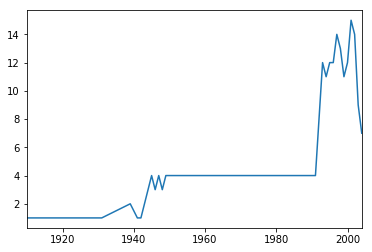

In [ ]:
df.Year.value_counts().sort_index().plot(x="Year")
plt.show()

Extracting year, month, day, hour, minute, second and weekday from unidentified flying object (UFO) reporting date.

In [ ]:
print("\nYear:")
display(df.Date_time.dt.year.head())
print("\nMonth:")
display(df.Date_time.dt.month.head())
print("\nDay:")
display(df.Date_time.dt.day.head())
print("\nHour:")
display(df.Date_time.dt.hour.head())
print("\nMinute:")
display(df.Date_time.dt.minute.head())
print("\nSecond:")
display(df.Date_time.dt.second.head())
print("\nWeekday:")
display(df.Date_time.dt.weekday_name.head())


Year:


0    1910
1    1920
2    1929
3    1931
4    1939
Name: Date_time, dtype: int64


Month:


0    6
1    6
2    7
3    6
4    6
Name: Date_time, dtype: int64


Day:


0     1
1    11
2     5
3     1
4     1
Name: Date_time, dtype: int64


Hour:


0    15
1    21
2    14
3    13
4    20
Name: Date_time, dtype: int64


Minute:


0    0
1    0
2    0
3    0
4    0
Name: Date_time, dtype: int64


Second:


0    0
1    0
2    0
3    0
4    0
Name: Date_time, dtype: int64


Weekday:


0    Wednesday
1       Friday
2       Friday
3       Monday
4     Thursday
Name: Date_time, dtype: object

Convert `datetime` to `timestamp`

In [ ]:
df_0 = pd.DataFrame(index=pd.DatetimeIndex(start=datetime.datetime(2019,1,1,0,0,1),
   end=datetime.datetime(2019,1,1,10,0,1), freq='H'))\
   .reset_index().rename(columns={'index':'datetime'})

df_0['ts'] = df_0.datetime.values.astype(np.int64) // 10 ** 9

print("\nConvert datetime to timestamp:")
display (df_0)


Convert datetime to timestamp:


C:\Users\javier.fernandez\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


,datetime,ts
0,2019-01-01 00:00:01,1546300801
1,2019-01-01 01:00:01,1546304401
2,2019-01-01 02:00:01,1546308001
3,2019-01-01 03:00:01,1546311601
4,2019-01-01 04:00:01,1546315201
5,2019-01-01 05:00:01,1546318801
6,2019-01-01 06:00:01,1546322401
7,2019-01-01 07:00:01,1546326001
8,2019-01-01 08:00:01,1546329601
9,2019-01-01 09:00:01,1546333201


Counting year-country wise frequency of reporting dates of unidentified flying object (UFO).

In [ ]:
result = df.groupby(['Year', 'country']).size()
print("Country-year wise frequency of reporting dates of UFO:")
result.reset_index()

Country-year wise frequency of reporting dates of UFO:


,Year,country,0
0,1910,us,1
1,1920,us,1
2,1929,us,1
3,1931,us,1
4,1939,us,2
5,1941,us,1
6,1942,us,1
7,1944,us,3
8,1945,us,4
9,1946,us,3


Extracting unique reporting dates of unidentified flying object (UFO).

In [ ]:
print("\nUnique reporting dates of UFO:")
df["Date_time"].dt.date.unique()


Unique reporting dates of UFO:


array([datetime.date(1910, 6, 1), datetime.date(1920, 6, 11),
       datetime.date(1929, 7, 5), datetime.date(1931, 6, 1),
       datetime.date(1939, 6, 1), datetime.date(1939, 7, 7),
       datetime.date(1941, 6, 1), datetime.date(1942, 6, 1),
       datetime.date(1944, 1, 1), datetime.date(1944, 6, 1),
       datetime.date(1944, 4, 2), datetime.date(1945, 6, 1),
       datetime.date(1945, 6, 7), datetime.date(1945, 8, 8),
       datetime.date(1945, 7, 10), datetime.date(1946, 2, 1),
       datetime.date(1946, 7, 1), datetime.date(1946, 1, 8),
       datetime.date(1947, 6, 1), datetime.date(1947, 7, 1),
       datetime.date(1948, 8, 1), datetime.date(1948, 5, 10),
       datetime.date(1948, 12, 12), datetime.date(1949, 5, 1),
       datetime.date(1949, 7, 1), datetime.date(1949, 4, 10),
       datetime.date(1950, 6, 1), datetime.date(1950, 8, 1),
       datetime.date(1950, 10, 1), datetime.date(1951, 6, 1),
       datetime.date(1951, 7, 1), datetime.date(1951, 2, 3),
       datetime.d

Getting the difference (in days) between documented date and reporting date of unidentified flying object (UFO).

In [ ]:
df['date_documented'] = df['date_documented'].astype('datetime64[ns]')
print("\nDifference (in days) between documented date and reporting date of UFO:")
df['Difference'] = (df['date_documented'] - df['Date_time']).dt.days
df.head()


Difference (in days) between documented date and reporting date of UFO:


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,Year,Difference
0,1910-06-01 15:00:00,wills point,tx,us,cigar,120,2 minutes,Cigar shaped object moving from West to East,2005-04-16,32.709167,-96.008056,1910,34652
1,1920-06-11 21:00:00,cicero,in,us,unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,2009-05-12,40.123889,-86.013333,1920,32476
2,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60,1min,we were traveling east of burns&#44clmbing up ...,2002-08-16,43.642500,-118.627500,1929,26704
3,1931-06-01 13:00:00,abilene,ks,us,disk,1800,30 min. approx.,This is a what my mother related to me regardi...,2006-02-14,38.917222,-97.213611,1931,27286
4,1939-06-01 20:00:00,waterloo,al,us,fireball,300,5 minutes,4 high school students see bright&#44 ground-l...,2014-02-21,34.918056,-88.064167,1939,27293


Adding 100 days with reporting date of unidentified flying object (UFO).

In [ ]:
print("\nAdd 100 days with reporting date:")
df['New_doc_dt'] = df['Date_time'] + datetime.timedelta(days=180)
df.head()


Add 100 days with reporting date:


,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,Year,Difference,New_doc_dt
0,1910-06-01 15:00:00,wills point,tx,us,cigar,120,2 minutes,Cigar shaped object moving from West to East,2005-04-16,32.709167,-96.008056,1910,34652,1910-11-28 15:00:00
1,1920-06-11 21:00:00,cicero,in,us,unknown,60,1 minute,((NUFORC Note: Probable hoax. Note date. PD...,2009-05-12,40.123889,-86.013333,1920,32476,1920-12-08 21:00:00
2,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60,1min,we were traveling east of burns&#44clmbing up ...,2002-08-16,43.642500,-118.627500,1929,26704,1930-01-01 14:00:00
3,1931-06-01 13:00:00,abilene,ks,us,disk,1800,30 min. approx.,This is a what my mother related to me regardi...,2006-02-14,38.917222,-97.213611,1931,27286,1931-11-28 13:00:00
4,1939-06-01 20:00:00,waterloo,al,us,fireball,300,5 minutes,4 high school students see bright&#44 ground-l...,2014-02-21,34.918056,-88.064167,1939,27293,1939-11-28 20:00:00


Generating sequences of fixed-frequency dates and time spans.

In [ ]:
dtr = pd.date_range('2018-01-01', periods=12, freq='H')
print("Hourly frequency:")
display(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='min')
print("\nMinutely frequency:")
display(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='S')
print("\nSecondly frequency:")
display(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='2H')
print("\nMultiple Hourly frequency:")
display(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='5min')
print("\nMultiple Minutely frequency:")
display(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='BQ')
print("\nMultiple Secondly frequency:")
display(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='w')
print("\nWeekly frequency:")
display(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='2h20min')
print("\nCombine together day and intraday offsets-1:")
display(dtr)
dtr = pd.date_range('2018-01-01', periods=12, freq='1D10U')
print("\nCombine together day and intraday offsets-2:")
display(dtr)

Hourly frequency:


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               '2018-01-01 10:00:00', '2018-01-01 11:00:00'],
              dtype='datetime64[ns]', freq='H')


Minutely frequency:


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:01:00',
               '2018-01-01 00:02:00', '2018-01-01 00:03:00',
               '2018-01-01 00:04:00', '2018-01-01 00:05:00',
               '2018-01-01 00:06:00', '2018-01-01 00:07:00',
               '2018-01-01 00:08:00', '2018-01-01 00:09:00',
               '2018-01-01 00:10:00', '2018-01-01 00:11:00'],
              dtype='datetime64[ns]', freq='T')


Secondly frequency:


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               '2018-01-01 00:00:10', '2018-01-01 00:00:11'],
              dtype='datetime64[ns]', freq='S')


Multiple Hourly frequency:


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 02:00:00',
               '2018-01-01 04:00:00', '2018-01-01 06:00:00',
               '2018-01-01 08:00:00', '2018-01-01 10:00:00',
               '2018-01-01 12:00:00', '2018-01-01 14:00:00',
               '2018-01-01 16:00:00', '2018-01-01 18:00:00',
               '2018-01-01 20:00:00', '2018-01-01 22:00:00'],
              dtype='datetime64[ns]', freq='2H')


Multiple Minutely frequency:


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:05:00',
               '2018-01-01 00:10:00', '2018-01-01 00:15:00',
               '2018-01-01 00:20:00', '2018-01-01 00:25:00',
               '2018-01-01 00:30:00', '2018-01-01 00:35:00',
               '2018-01-01 00:40:00', '2018-01-01 00:45:00',
               '2018-01-01 00:50:00', '2018-01-01 00:55:00'],
              dtype='datetime64[ns]', freq='5T')


Multiple Secondly frequency:


DatetimeIndex(['2018-03-30', '2018-06-29', '2018-09-28', '2018-12-31',
               '2019-03-29', '2019-06-28', '2019-09-30', '2019-12-31',
               '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='BQ-DEC')


Weekly frequency:


DatetimeIndex(['2018-01-07', '2018-01-14', '2018-01-21', '2018-01-28',
               '2018-02-04', '2018-02-11', '2018-02-18', '2018-02-25',
               '2018-03-04', '2018-03-11', '2018-03-18', '2018-03-25'],
              dtype='datetime64[ns]', freq='W-SUN')


Combine together day and intraday offsets-1:


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 02:20:00',
               '2018-01-01 04:40:00', '2018-01-01 07:00:00',
               '2018-01-01 09:20:00', '2018-01-01 11:40:00',
               '2018-01-01 14:00:00', '2018-01-01 16:20:00',
               '2018-01-01 18:40:00', '2018-01-01 21:00:00',
               '2018-01-01 23:20:00', '2018-01-02 01:40:00'],
              dtype='datetime64[ns]', freq='140T')


Combine together day and intraday offsets-2:


DatetimeIndex([       '2018-01-01 00:00:00', '2018-01-02 00:00:00.000010',
               '2018-01-03 00:00:00.000020', '2018-01-04 00:00:00.000030',
               '2018-01-05 00:00:00.000040', '2018-01-06 00:00:00.000050',
               '2018-01-07 00:00:00.000060', '2018-01-08 00:00:00.000070',
               '2018-01-09 00:00:00.000080', '2018-01-10 00:00:00.000090',
               '2018-01-11 00:00:00.000100', '2018-01-12 00:00:00.000110'],
              dtype='datetime64[ns]', freq='86400000010U')

Conversion between strings and datetime:

In [ ]:
from dateutil.parser import parse

In [ ]:
stamp = datetime.datetime(2019,7,1)
stamp

datetime.datetime(2019, 7, 1, 0, 0)

In [ ]:
print("\nConvert datatime to strings:")
print(stamp.strftime('%Y-%m-%d'))
print(stamp.strftime('%d/%b/%y'))
print("\nConvert strings to datatime:")
print(parse('Sept 17th 2019'))
print(parse('1/11/2019'))
print(parse('1/11/2019', dayfirst=True))


Convert datatime to strings:
2019-07-01
01/Jul/19

Convert strings to datatime:
2019-09-17 00:00:00
2019-01-11 00:00:00
2019-11-01 00:00:00


Manipulate and convert date times with timezone information.

In [ ]:
dtt = pd.date_range('2018-01-01', periods=3, freq='H')
dtt = dtt.tz_localize('UTC')
print(dtt)
print("\nFrom UTC to America/Los_Angeles:")
dtt = dtt.tz_convert('America/Los_Angeles')
print(dtt)

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 01:00:00+00:00',
               '2018-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

From UTC to America/Los_Angeles:
DatetimeIndex(['2017-12-31 16:00:00-08:00', '2017-12-31 17:00:00-08:00',
               '2017-12-31 18:00:00-08:00'],
              dtype='datetime64[ns, America/Los_Angeles]', freq='H')


Getting the average mean of the UFO (unidentified flying object) sighting was reported.

In [ ]:
# Add a new column instance, this adds a value to each instance of ufo sighting
df['instance'] = 1

# set index to time, this makes df a time series df and then you can apply pandas time series functions.
df.set_index(df['date_documented'], drop=True, inplace=True)

# create another df by resampling the original df and counting the instance column by Month ('M' is resample by month)
ufo2 = pd.DataFrame(df['instance'].resample('M').count())

# just to find month of resampled observation
ufo2['date_documented'] = pd.to_datetime(ufo2.index.values)

ufo2['month'] = ufo2['date_documented'].apply(lambda x: x.month)
print("Average mean of the UFO (unidentified flying object) sighting was reported:")
print(ufo2.groupby(by='month').mean())

Average mean of  the UFO (unidentified flying object) sighting was reported:
       instance
month          
1      2.875000
2      2.500000
3      1.764706
4      2.250000
5      1.375000
6      1.187500
7      1.562500
8      2.062500
9      1.312500
10     1.687500
11     1.437500
12     1.562500
